In [2]:
import numpy as np
import pandas as pd
import warnings

In [3]:
train  = pd.read_csv('./data/train.csv')
test  = pd.read_csv('./data/test.csv')

train = train.drop(['index'],axis = 1)
test =test.drop(['index'],axis = 1)

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 69 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Q1            14959 non-null  float64
 1   Q2            14931 non-null  float64
 2   Q3            14950 non-null  float64
 3   Q4            14929 non-null  float64
 4   Q5            14962 non-null  float64
 5   Q6            14952 non-null  float64
 6   Q7            14924 non-null  float64
 7   Q8            14952 non-null  float64
 8   Q9            14944 non-null  float64
 9   Q10           14928 non-null  float64
 10  Q11           14941 non-null  float64
 11  Q12           14933 non-null  float64
 12  Q13           14960 non-null  float64
 13  Q14           14964 non-null  float64
 14  Q15           14955 non-null  float64
 15  Q16           14967 non-null  float64
 16  Q17           14963 non-null  float64
 17  Q18           14937 non-null  float64
 18  Q19           14947 non-nu

In [5]:
concat_features = train

In [6]:
concat_features.introelapse

0         3
1         5
2         9
3         2
4         3
         ..
14995    12
14996    31
14997    17
14998    14
14999     8
Name: introelapse, Length: 15000, dtype: int64

In [7]:
concat_features.introelapse.quantile(0.75)

36.0

In [8]:
concat_features.introelapse.quantile(0.25)

4.0

In [9]:
for name in ['education', 'urban', 'gender', 'engnat', 'hand', 'religion',
            'voted', 'married']:

    mergedata = pd.get_dummies(train[name], prefix = name)
    train = pd.concat([train, mergedata], axis=1)
    train = train.drop([name], axis = 1)

In [10]:
for name in ['education', 'urban', 'gender', 'engnat', 'hand', 'religion',
            'voted', 'married']:

    mergedata = pd.get_dummies(test[name], prefix = name)
    test = pd.concat([test, mergedata], axis=1)
    test = test.drop([name], axis = 1)

<AxesSubplot: >

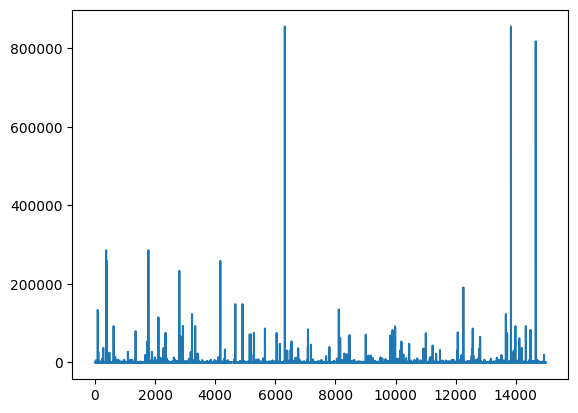

In [11]:
train.introelapse.plot()

In [12]:
train['Ex'] = train['TIPI1']-train['TIPI6']
train['Ag'] = train['TIPI7']-train['TIPI2']
train['Con'] = train['TIPI3']-train['TIPI8']
train['Es'] =train['TIPI9']-train['TIPI4']
train['Op'] =train['TIPI5']-train['TIPI10']

In [13]:
test['Ex'] = test['TIPI1']-test['TIPI6']
test['Ag'] = test['TIPI7']-test['TIPI2']
test['Con'] = test['TIPI3']-test['TIPI8']
test['Es'] =test['TIPI9']-test['TIPI4']
test['Op'] =test['TIPI5']-test['TIPI10']

In [14]:
train = train.drop(['TIPI1','TIPI2','TIPI3','TIPI4','TIPI5',
                   'TIPI6','TIPI7','TIPI8','TIPI9','TIPI10'],axis = 1)

test = test.drop(['TIPI1','TIPI2','TIPI3','TIPI4','TIPI5',
                   'TIPI6','TIPI7','TIPI8','TIPI9','TIPI10'],axis = 1)

In [15]:
train_x=train.drop(['nerdiness'], axis=1)
train_y=train['nerdiness']

In [16]:
from pycaret.utils import enable_colab
from pycaret.classification import *

In [17]:
import sklearn
sklearn.__version__

'0.23.2'

In [18]:
clf = setup(data = train, target = 'nerdiness')

,Description,Value
0,session_id,3698
1,Target,nerdiness
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(15000, 89)"
5,Missing Values,True
6,Numeric Features,37
7,Categorical Features,51
8,Ordinal Features,False
9,High Cardinality Features,False


In [19]:
best_2 = compare_models(sort = 'AUC', n_select = 2)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.7656,0.8559,0.8240,0.7693,0.7956,0.5216,0.5235,0.4260
rf,Random Forest Classifier,0.7650,0.8515,0.8273,0.7668,0.7958,0.5200,0.5223,0.3080
catboost,CatBoost Classifier,0.7535,0.8223,0.8157,0.7579,0.7856,0.4966,0.4987,1.6080
xgboost,Extreme Gradient Boosting,0.7510,0.8198,0.8032,0.7607,0.7813,0.4928,0.4940,1.4110
lightgbm,Light Gradient Boosting Machine,0.7434,0.8142,0.8020,0.7515,0.7758,0.4766,0.4781,0.0800
gbc,Gradient Boosting Classifier,0.7305,0.7988,0.7920,0.7398,0.7649,0.4499,0.4516,0.8860
lda,Linear Discriminant Analysis,0.7206,0.7874,0.7848,0.7308,0.7567,0.4297,0.4314,0.2800
ada,Ada Boost Classifier,0.7185,0.7867,0.7760,0.7320,0.7533,0.4264,0.4275,0.2340
lr,Logistic Regression,0.6877,0.7648,0.7839,0.7012,0.7357,0.3555,0.3663,0.9550
dt,Decision Tree Classifier,0.6880,0.6845,0.7166,0.7189,0.7177,0.3689,0.3690,0.1020


In [20]:
best_2 = compare_models(sort = 'Accuracy', n_select = 2)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.7656,0.8559,0.8240,0.7693,0.7956,0.5216,0.5235,0.4260
rf,Random Forest Classifier,0.7650,0.8515,0.8273,0.7668,0.7958,0.5200,0.5223,0.3070
catboost,CatBoost Classifier,0.7535,0.8223,0.8157,0.7579,0.7856,0.4966,0.4987,1.5480
xgboost,Extreme Gradient Boosting,0.7510,0.8198,0.8032,0.7607,0.7813,0.4928,0.4940,1.3950
lightgbm,Light Gradient Boosting Machine,0.7434,0.8142,0.8020,0.7515,0.7758,0.4766,0.4781,0.0750
gbc,Gradient Boosting Classifier,0.7305,0.7988,0.7920,0.7398,0.7649,0.4499,0.4516,0.8890
ridge,Ridge Classifier,0.7211,0.0000,0.7855,0.7311,0.7572,0.4306,0.4324,0.0430
lda,Linear Discriminant Analysis,0.7206,0.7874,0.7848,0.7308,0.7567,0.4297,0.4314,0.2770
ada,Ada Boost Classifier,0.7185,0.7867,0.7760,0.7320,0.7533,0.4264,0.4275,0.2340
dt,Decision Tree Classifier,0.6880,0.6845,0.7166,0.7189,0.7177,0.3689,0.3690,0.0940


In [21]:
blended = blend_models(estimator_list = best_2, fold = 4, method = 'soft')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7528,0.8399,0.8307,0.7497,0.7881,0.4932,0.4970
1,0.7650,0.8482,0.8403,0.7603,0.7983,0.5184,0.5221
2,0.7699,0.8508,0.8217,0.7758,0.7981,0.5311,0.5323
3,0.7611,0.8450,0.8238,0.7634,0.7925,0.5119,0.5139
Mean,0.7622,0.8460,0.8291,0.7623,0.7942,0.5137,0.5163
Std,0.0063,0.0041,0.0073,0.0093,0.0043,0.0137,0.0129


In [22]:
pred_holdout = predict_model(blended)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Voting Classifier,0.7818,0.8695,0.8382,0.7829,0.8096,0.5548,0.5566


In [23]:
final_model = finalize_model(blended)

In [24]:
predictions = predict_model(final_model, data = test)

In [25]:
predictions['Score']

0        0.850
1        0.785
2        0.795
3        0.525
4        0.955
         ...  
35447    0.915
35448    0.770
35449    0.920
35450    0.880
35451    0.665
Name: Score, Length: 35452, dtype: float64

In [26]:
predictions['Label']

0        0
1        1
2        1
3        1
4        1
        ..
35447    1
35448    1
35449    1
35450    0
35451    1
Name: Label, Length: 35452, dtype: int32

In [27]:
predictions.loc[predictions['Label'] == 0, 'Score'] = 1 - predictions.loc[predictions['Label'] == 0, 'Score']

In [28]:
predictions['Score']

0        0.150
1        0.785
2        0.795
3        0.525
4        0.955
         ...  
35447    0.915
35448    0.770
35449    0.920
35450    0.120
35451    0.665
Name: Score, Length: 35452, dtype: float64

In [29]:
sub = predictions['Score']

In [30]:
sub

0        0.150
1        0.785
2        0.795
3        0.525
4        0.955
         ...  
35447    0.915
35448    0.770
35449    0.920
35450    0.120
35451    0.665
Name: Score, Length: 35452, dtype: float64

In [31]:
submission = pd.read_csv('./data/sample_submission.csv')

submission['nerdiness'] = sub

In [32]:
submission

,index,nerdiness
0,0,0.150
1,1,0.785
2,2,0.795
3,3,0.525
4,4,0.955
...,...,...
35447,35447,0.915
35448,35448,0.770
35449,35449,0.920
35450,35450,0.120


In [33]:
submission.to_csv("./submit/submit2.csv", index = False)